In [9]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load Dataset
df = pd.read_csv("student-mat.csv",delimiter=';')

In [16]:
# Display the first few rows using .head().
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [12]:
# EDA
# Check for missing values using .isnull().sum()
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [19]:
# Display column data types using .dtypes
data_type = df.dtypes
print(data_type)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [13]:
# Display shape of dataset
df.shape

(395, 33)

In [22]:
# Data Cleaning
df = df.drop_duplicates()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [24]:
#Q1 What is the average score in math (G3)?
sum = 0
for i in df['G3']:
      sum = sum+i
avg = sum/395
print(avg)

10.415189873417722


In [25]:
# Q2 Howmanystudents scored above 15 in their final grade (G3)?
count = 0
for i in df['G3']:
    if i>15:
        count+=1
print(f"The number who scored above 15 is {count}")

The number who scored above 15 is 40


In [28]:
# Q3 Is there a correlation between study time (study time) and the final grade (G3)?
study_correlation = df['studytime'].corr(df['G3'])
print(f"The correlation between studytime and G3 is {study_correlation}")

The correlation between studytime and G3 is 0.09781968965319636


In [30]:
# Q4 Which gender has a higher average final grade (G3)?
high = df.groupby('sex')['G3'].mean()
print(high)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


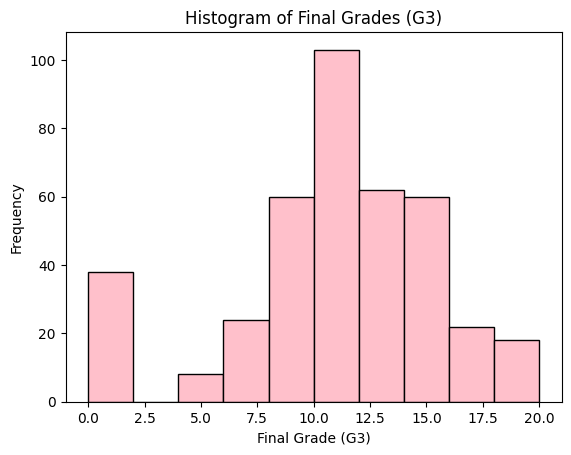

In [34]:
# Plot a histogram of final grades (G3).
plt.hist(df['G3'],color='pink',edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

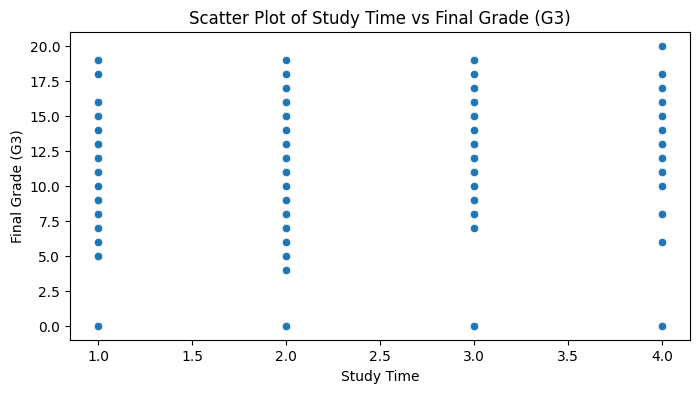

In [37]:
# Create a scatter plot between study time (study time) and final grade (G3).
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['studytime'], y=df['G3'])
plt.title('Scatter Plot of Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

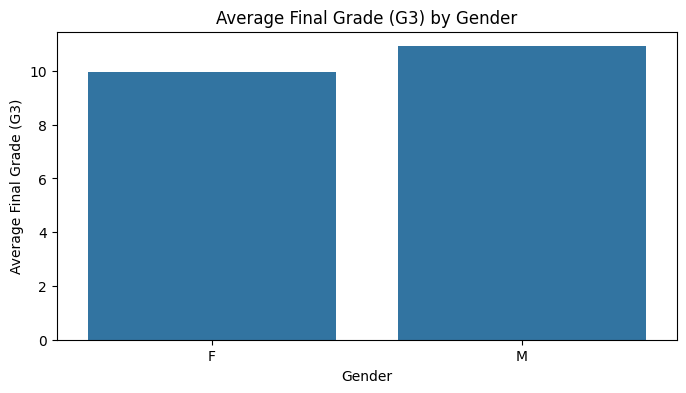

In [41]:
# Create a bar chart comparing the average scores of male and female students.
average_g3_by_gender = df.groupby('sex')['G3'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='sex', y='G3', data=average_g3_by_gender)
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()